In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('tennis_stats.csv')
df.head()

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,...,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,...,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,...,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,...,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,...,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272


In [3]:
df.shape

(1721, 24)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1721 entries, 0 to 1720
Data columns (total 24 columns):
Player                        1721 non-null object
Year                          1721 non-null int64
FirstServe                    1721 non-null float64
FirstServePointsWon           1721 non-null float64
FirstServeReturnPointsWon     1721 non-null float64
SecondServePointsWon          1721 non-null float64
SecondServeReturnPointsWon    1721 non-null float64
Aces                          1721 non-null int64
BreakPointsConverted          1721 non-null float64
BreakPointsFaced              1721 non-null int64
BreakPointsOpportunities      1721 non-null int64
BreakPointsSaved              1721 non-null float64
DoubleFaults                  1721 non-null int64
ReturnGamesPlayed             1721 non-null int64
ReturnGamesWon                1721 non-null float64
ReturnPointsWon               1721 non-null float64
ServiceGamesPlayed            1721 non-null int64
ServiceGamesWon         

# The ATP men’s tennis dataset includes a wide array of tennis statistics, which are described below:

## Identifying Data
``Player:`` name of the tennis player

``Year:`` year data was recorded

## Service Game Columns (Offensive)
``Aces:`` number of serves by the player where the receiver does not touch the ball

``DoubleFaults:`` number of times player missed both first and second serve attempts

``FirstServe:`` % of first-serve attempts made

``FirstServePointsWon:`` % of first-serve attempt points won by the player

``SecondServePointsWon:`` % of second-serve attempt points won by the player

``BreakPointsFaced:`` number of times where the receiver could have won service game of the player

``BreakPointsSaved:`` % of the time the player was able to stop the receiver from winning service game when they had the chance

``ServiceGamesPlayed:`` total number of games where the player served

``ServiceGamesWon:`` total number of games where the player served and won

``TotalServicePointsWon:`` % of points in games where the player served that they won



## Return Game Columns (Defensive)
``FirstServeReturnPointsWon:`` % of opponents first-serve points the player was able to win

``SecondServeReturnPointsWon:`` % of opponents second-serve points the player was able to win

``BreakPointsOpportunities:`` number of times where the player could have won the service game of the opponent

``BreakPointsConverted:`` % of the time the player was able to win their opponent’s service game when they had the chance

``ReturnGamesPlayed:`` total number of games where the player’s opponent served

``ReturnGamesWon:`` total number of games where the player’s opponent served and the player won

``ReturnPointsWon:`` total number of points where the player’s opponent served and the player won

``TotalPointsWon:`` % of points won by the player



## Outcomes
``Wins:`` number of matches won in a year

``Losses:`` number of matches lost in a year

``Winnings:`` total winnings in USD($) in a year

``Ranking:`` ranking at the end of year


In [5]:
df.columns

Index(['Player', 'Year', 'FirstServe', 'FirstServePointsWon',
       'FirstServeReturnPointsWon', 'SecondServePointsWon',
       'SecondServeReturnPointsWon', 'Aces', 'BreakPointsConverted',
       'BreakPointsFaced', 'BreakPointsOpportunities', 'BreakPointsSaved',
       'DoubleFaults', 'ReturnGamesPlayed', 'ReturnGamesWon',
       'ReturnPointsWon', 'ServiceGamesPlayed', 'ServiceGamesWon',
       'TotalPointsWon', 'TotalServicePointsWon', 'Wins', 'Losses', 'Winnings',
       'Ranking'],
      dtype='object')

In [6]:
df.describe()

,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,BreakPointsOpportunities,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
count,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,...,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1.721000e+03,1721.000000
mean,2013.646717,0.598053,0.680738,0.261673,0.479733,0.466432,97.105171,0.369407,112.003486,102.918071,...,0.173823,0.342208,197.650203,0.715590,0.473155,0.599245,7.876816,9.278908,2.344928e+05,269.610691
std,2.488018,0.054533,0.070422,0.056639,0.066902,0.068447,137.966077,0.162987,119.247651,122.761670,...,0.080880,0.049369,221.208703,0.123287,0.037139,0.057718,10.183716,8.996450,2.530537e+05,277.341947
min,2009.000000,0.360000,0.270000,0.000000,0.060000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.220000,0.250000,0.000000,0.000000,1.080000e+02,3.000000
25%,2012.000000,0.570000,0.650000,0.240000,0.460000,0.440000,7.000000,0.320000,15.000000,9.000000,...,0.130000,0.320000,22.000000,0.670000,0.460000,0.570000,0.000000,2.000000,4.931100e+04,83.000000
50%,2014.000000,0.600000,0.690000,0.270000,0.490000,0.480000,34.000000,0.380000,55.000000,41.000000,...,0.180000,0.350000,86.000000,0.750000,0.480000,0.610000,3.000000,5.000000,1.252120e+05,166.000000
75%,2016.000000,0.630000,0.720000,0.290000,0.520000,0.500000,140.000000,0.430000,201.000000,172.000000,...,0.220000,0.370000,348.000000,0.790000,0.500000,0.630000,13.000000,17.000000,3.500750e+05,333.000000
max,2017.000000,0.880000,0.890000,0.480000,0.920000,0.750000,1185.000000,1.000000,507.000000,573.000000,...,0.560000,0.510000,916.000000,1.000000,0.820000,0.820000,48.000000,36.000000,1.074562e+06,1443.000000


## Exploratory Analysis

In [7]:
df.corr()

,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,BreakPointsOpportunities,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
Year,1.000000,0.051406,-0.016728,-0.106784,0.005300,-0.039087,-0.108367,-0.072404,-0.101735,-0.114806,...,-0.073256,-0.078229,-0.108477,-0.008930,-0.041790,-0.005544,-0.108235,-0.077181,0.043908,-0.040483
FirstServe,0.051406,1.000000,-0.070659,0.025488,0.101417,-0.001924,0.048149,-0.018877,0.057709,0.062345,...,-0.010676,0.004189,0.071920,0.137473,0.148349,0.180996,0.064832,0.053736,0.057882,-0.068759
FirstServePointsWon,-0.016728,-0.070659,1.000000,0.021729,0.320765,-0.004724,0.460323,-0.041538,0.301925,0.324853,...,-0.010193,-0.002793,0.376460,0.817829,0.648753,0.860033,0.356702,0.330581,0.361121,-0.150004
FirstServeReturnPointsWon,-0.106784,0.025488,0.021729,1.000000,0.072707,0.301265,0.140165,0.324057,0.295724,0.313338,...,0.757435,0.834267,0.261206,0.091319,0.496682,0.052335,0.256029,0.243278,0.240808,-0.178664
SecondServePointsWon,0.005300,0.101417,0.320765,0.072707,1.000000,0.103584,0.266269,0.052755,0.258691,0.277782,...,0.096622,0.095585,0.296809,0.650764,0.622673,0.713076,0.268979,0.250918,0.281215,-0.181013
SecondServeReturnPointsWon,-0.039087,-0.001924,-0.004724,0.301265,0.103584,1.000000,0.095494,0.264413,0.234212,0.249583,...,0.603755,0.727338,0.209521,0.096553,0.408975,0.055004,0.193093,0.185217,0.199401,-0.159592
Aces,-0.108367,0.048149,0.460323,0.140165,0.266269,0.095494,1.000000,0.037188,0.757405,0.784934,...,0.139987,0.138023,0.866138,0.440922,0.428679,0.472101,0.825301,0.768628,0.798404,-0.277811
BreakPointsConverted,-0.072404,-0.018877,-0.041538,0.324057,0.052755,0.264413,0.037188,1.000000,0.096368,0.086502,...,0.561759,0.387170,0.083182,-0.025670,0.255050,-0.007254,0.076989,0.062297,0.075022,-0.051005
BreakPointsFaced,-0.101735,0.057709,0.301925,0.295724,0.258691,0.234212,0.757405,0.096368,1.000000,0.973352,...,0.335205,0.331043,0.971296,0.354012,0.463110,0.354005,0.883470,0.943309,0.876036,-0.322082
BreakPointsOpportunities,-0.114806,0.062345,0.324853,0.313338,0.277782,0.249583,0.784934,0.086502,0.973352,1.000000,...,0.358483,0.352783,0.978278,0.372271,0.491198,0.380716,0.923453,0.909295,0.900444,-0.334548


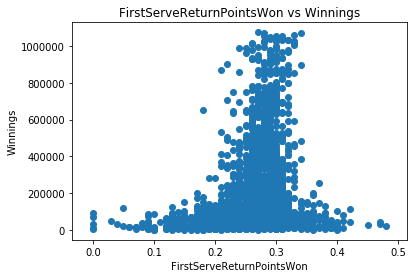

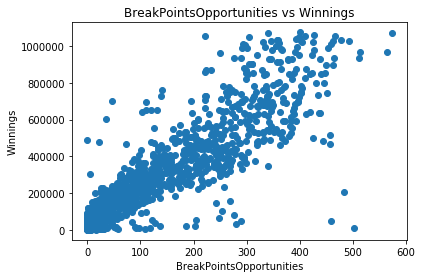

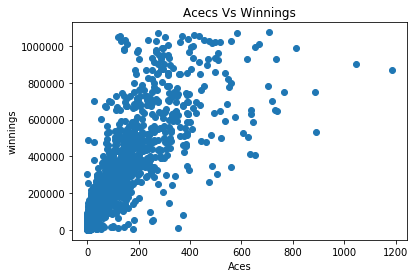

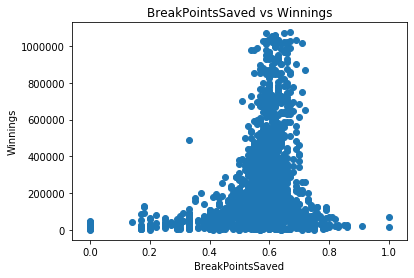

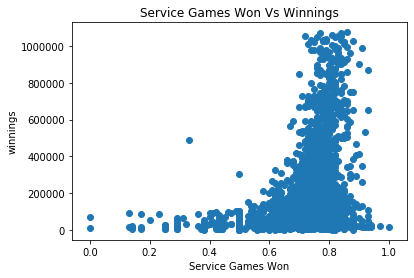

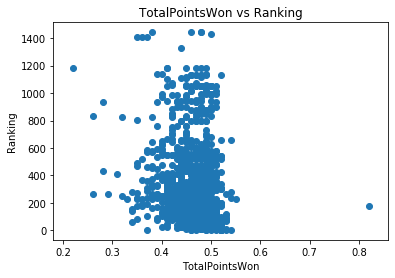

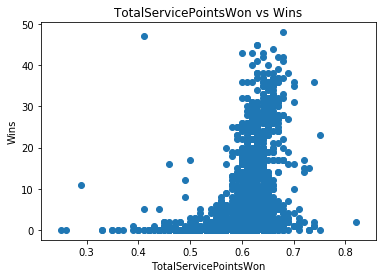

<Figure size 432x288 with 0 Axes>

In [8]:
plt.scatter(df['FirstServeReturnPointsWon'],df['Winnings'])
plt.title('FirstServeReturnPointsWon vs Winnings')
plt.xlabel('FirstServeReturnPointsWon')
plt.ylabel('Winnings')
plt.show()
plt.clf()

plt.scatter(df['BreakPointsOpportunities'],df['Winnings'])
plt.title('BreakPointsOpportunities vs Winnings')
plt.xlabel('BreakPointsOpportunities')
plt.ylabel('Winnings')
plt.show()
plt.clf()

plt.scatter(df.Aces, df.Winnings)
plt.title("Acecs Vs Winnings")
plt.xlabel("Aces")
plt.ylabel("winnings")
plt.show()
plt.clf()

plt.scatter(df['BreakPointsSaved'],df['Winnings'])
plt.title('BreakPointsSaved vs Winnings')
plt.xlabel('BreakPointsSaved')
plt.ylabel('Winnings')
plt.show()
plt.clf()

plt.scatter(df.ServiceGamesWon, df.Winnings)
plt.title("Service Games Won Vs Winnings")
plt.xlabel("Service Games Won")
plt.ylabel("winnings")
plt.show()
plt.show()

plt.scatter(df['TotalPointsWon'],df['Ranking'])
plt.title('TotalPointsWon vs Ranking')
plt.xlabel('TotalPointsWon')
plt.ylabel('Ranking')
plt.show()
plt.clf()

plt.scatter(df['TotalServicePointsWon'],df['Wins'])
plt.title('TotalServicePointsWon vs Wins')
plt.xlabel('TotalServicePointsWon')
plt.ylabel('Wins')
plt.show()
plt.clf()

In [9]:
# select features and predict values
X = df[['Aces']]
y = df[['Winnings']]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
print("Predicting Winnings with Aces Test Score:", model.score(X_test, y_test))

Predicting Winnings with Aces Test Score: 0.6721624742964638


In [14]:
win_predictions = model.predict(X_test)

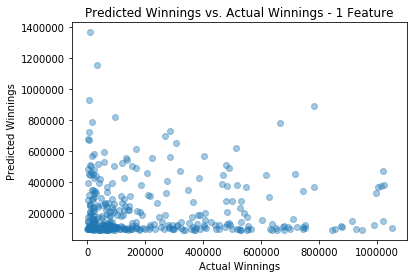

<Figure size 432x288 with 0 Axes>

In [25]:
plt.scatter(y_test,win_predictions, alpha=0.4)
plt.title('Predicted Winnings vs. Actual Winnings - 1 Feature')
plt.xlabel('Actual Winnings')
plt.ylabel('Predicted Winnings')
plt.show()
plt.clf()

In [49]:
X = df[['FirstServeReturnPointsWon']]
y = df[['Winnings']]

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)

In [51]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [52]:
print("Predicting Winnings with first serve point won test score: ", model.score(X_test, y_test))

Predicting Winnings with first serve point won test score:  0.07314845762253952


In [53]:
winning_predictions = model.predict(X_test)

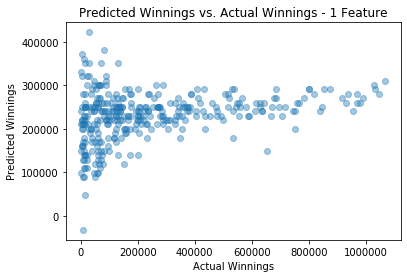

<Figure size 432x288 with 0 Axes>

In [43]:
plt.scatter(y_test,winning_predictions, alpha=0.4)
plt.title('Predicted Winnings vs. Actual Winnings - 1 Feature')
plt.xlabel('Actual Winnings')
plt.ylabel('Predicted Winnings')
plt.show()
plt.clf()

Predicting Winnings with Multiple Test Scores: 0.855644678987038


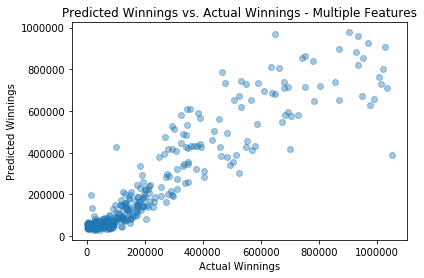

<Figure size 432x288 with 0 Axes>

In [69]:
# select features and value to predict
features = df[['BreakPointsOpportunities']]
winnings = df[['Winnings']]

# train, test, split the data
features_train, features_test, winnings_train, winnings_test = train_test_split(features, winnings, train_size = 0.8)

# create and train model on training data
model = LinearRegression()
model.fit(features_train,winnings_train)

# score model on test data
print('Predicting Winnings with BreakPointsOpportunities Test Score:', model.score(features_test,winnings_test))

# make predictions with model
winnings_prediction = model.predict(features_test)

# plot predictions against actual winnings
plt.scatter(winnings_test,winnings_prediction, alpha=0.4)
plt.title('Predicted Winnings vs. Actual Winnings - 1 Feature')
plt.xlabel('Actual Winnings')
plt.ylabel('Predicted Winnings')
plt.show()
plt.clf()

## Two Feature Linear Regression

Predicting Winnings with 2 features Test Score: 0.8222386818441776


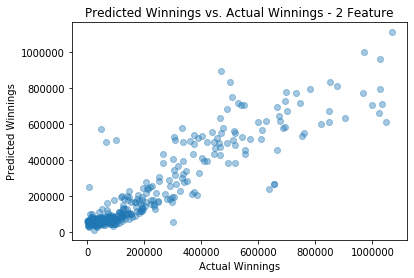

<Figure size 432x288 with 0 Axes>

In [66]:
# select features and value to predict
features = df[['FirstServeReturnPointsWon' ,'BreakPointsOpportunities']]
winnings = df[['Winnings']]

# train, test, split the data
features_train, features_test, winnings_train, winnings_test = train_test_split(features, winnings, train_size = 0.8)

# create and train model on training data
model = LinearRegression()
model.fit(features_train,winnings_train)

# score model on test data
print('Predicting Winnings with 2 features Test Score:', model.score(features_test,winnings_test))

# make predictions with model
winnings_prediction = model.predict(features_test)

# plot predictions against actual winnings
plt.scatter(winnings_test,winnings_prediction, alpha=0.4)
plt.title('Predicted Winnings vs. Actual Winnings - 2 Feature')
plt.xlabel('Actual Winnings')
plt.ylabel('Predicted Winnings')
plt.show()
plt.clf()

## Multiple Linear Regression

Predicting Winnings with Multiple Features Test Score: 0.8203584835340474


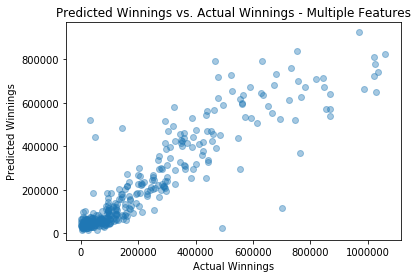

<Figure size 432x288 with 0 Axes>

In [70]:
## multiple features linear regression

# select features and value to predict
features = df[['FirstServe','FirstServePointsWon','FirstServeReturnPointsWon',
                    'SecondServePointsWon','SecondServeReturnPointsWon','Aces',
                    'BreakPointsConverted','BreakPointsFaced','BreakPointsOpportunities',
                    'BreakPointsSaved','DoubleFaults','ReturnGamesPlayed','ReturnGamesWon',
                    'ReturnPointsWon','ServiceGamesPlayed','ServiceGamesWon','TotalPointsWon',
                    'TotalServicePointsWon']]
winnings = df[['Winnings']]

# train, test, split the data
features_train, features_test, winnings_train, winnings_test = train_test_split(features, winnings, train_size = 0.8)

# create and train model on training data
model = LinearRegression()
model.fit(features_train,winnings_train)

# score model on test data
print('Predicting Winnings with Multiple Features Test Score:', model.score(features_test,winnings_test))

# make predictions with model
winnings_prediction = model.predict(features_test)

# plot predictions against actual winnings
plt.scatter(winnings_test,winnings_prediction, alpha=0.4)
plt.title('Predicted Winnings vs. Actual Winnings - Multiple Features')
plt.xlabel('Actual Winnings')
plt.ylabel('Predicted Winnings')
plt.show()
plt.clf()